In [1]:
from automata.fa.dfa import DFA
import memReq
import utils

We illustrate results about the memory requirements of regular reachability objectives.
We first obtain a smallest memory for the two examples from [the paper](https://arxiv.org/abs/2210.09703) (Example 9 and Example 12).

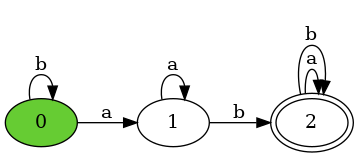

In [2]:
ab = utils.abab(2)
utils.view_dfa(ab) # Requires that Graphviz is installed and that program 'dot' is on the PATH

Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.
SAT encoding finished with 2 states, solving...


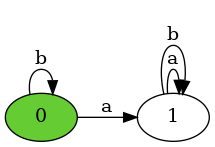

In [3]:
M = memReq.smallest_memory_reachability(ab)
utils.view_dfa(M)

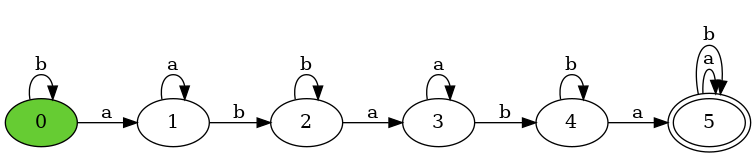

In [4]:
ababa = utils.abab(5)
utils.view_dfa(ababa)

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.


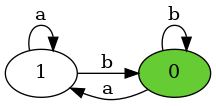

In [5]:
M = memReq.smallest_memory_reachability(ababa)
utils.view_dfa(M)

We also use examples that were considered to illustrate regular safety objectives, and obtain the memory of their complement.

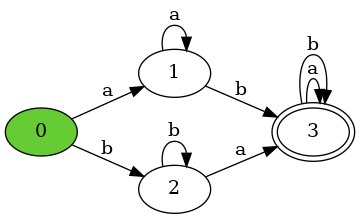

In [6]:
d1 = utils.diamond_generalized(1)
utils.view_dfa(d1)

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Not possible with 2 states.
SAT encoding finished with 3 states, solving...


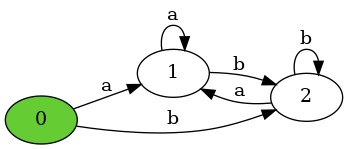

In [7]:
M = memReq.smallest_memory_reachability(d1)
utils.view_dfa(M)

If we just focus on the progress-consistency property, we can also obtain a smallest memory structure $\mathcal{M}$ such that an automaton is $\mathcal{M}$-progress-consistent.

Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Not possible with 1 states.


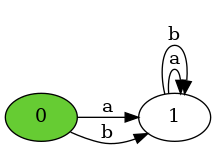

In [8]:
M = memReq.smallest_memory_reachability(d1, monotone=False)
utils.view_dfa(M)

For larger automata, as `smallest_memory_reachability()` may take some time, we can just try with some fixed number of states.

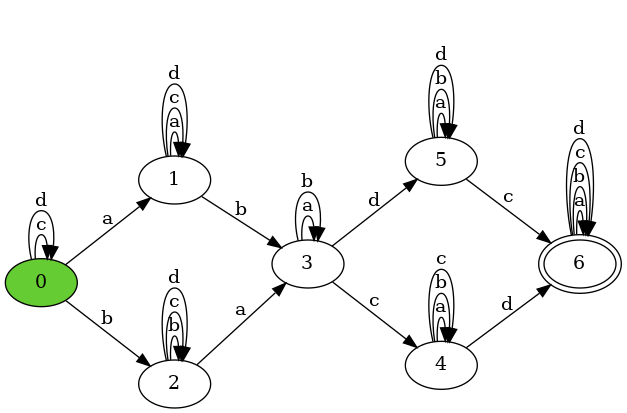

In [9]:
d2 = utils.diamond_generalized(2)
utils.view_dfa(d2)

In [10]:
f = memReq.progress_consistent(d2, monotone=True)

In [11]:
b, val, d_mcm = f(5)
b

SAT encoding finished with 5 states, solving...


False

In [12]:
b, val, d_mcm = f(6)
b

SAT encoding finished with 6 states, solving...


True

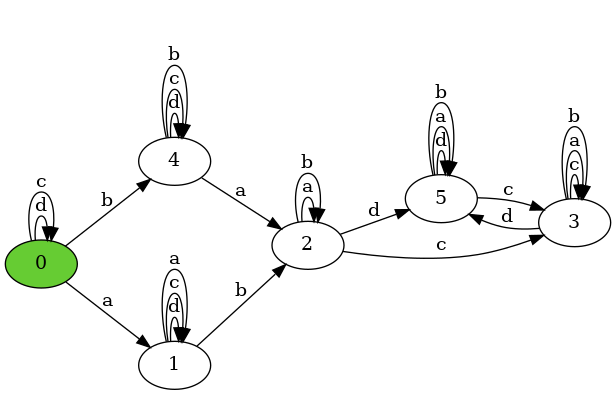

In [13]:
M = memReq.progress_consistent_valuation_to_aut(d2, 6, val, d_mcm)
utils.view_dfa(M)

We also illustrate our results on objective $C^*a^nC^\omega$, whose smallest chromatic memory structure was shown to have $n$ states in https://arxiv.org/abs/2209.12044.
We prove it automatically for $n = 5$.

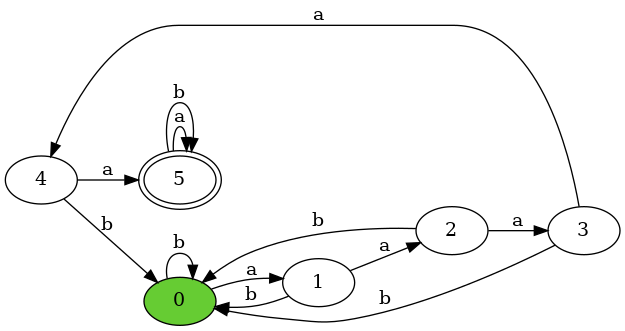

In [14]:
aaaaa = utils.aaaa(5)
utils.view_dfa(aaaaa)

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Not possible with 3 states.
Trying with 4 states...
SAT encoding finished with 4 states, solving...
Solved! Not possible with 4 states.
SAT encoding finished with 5 states, solving...


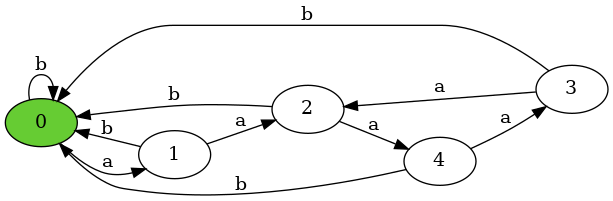

In [15]:
M = memReq.smallest_memory_reachability(aaaaa, monotone=True)
utils.view_dfa(M)

This objective has a total prefix preorder (its states are ordered from left to right for their winning continuations), which we can confirm by showing that the memoryless strategies suffice for the derived regular safety objective.

Trying with 3 states...
SAT encoding finished with 3 states, solving...
Solved! Possible with 3 states.
Trying with 2 states...
SAT encoding finished with 2 states, solving...
Solved! Possible with 2 states.
Trying with 1 states...
SAT encoding finished with 1 states, solving...
Solved! Possible with 1 states.
\Gamma_0 = ['0', '1', '2', '3', '4', '5']


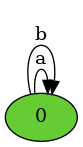

In [16]:
M = memReq.smallest_memory_safety(aaaaa)
utils.view_dfa(M)